In [14]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats


In [15]:

T = 1.0  # Temps total (1 unité de temps)
n_steps = 1000  # Nombre de pas dans le temps continu
dt = T / n_steps

rho = 0.6
vol_1, vol_2 = 0.2, 0.3  # Volatilités des actifs

dW1 = np.random.normal(0, np.sqrt(dt), n_steps)
dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), n_steps)

P1 = np.cumsum(dW1 * vol_1) + 100
P2 = np.cumsum(dW2 * vol_2) + 100

obs_1 = np.sort(np.random.choice(range(n_steps), size=n_steps // 3, replace=False))
obs_2 = np.sort(np.random.choice(range(n_steps), size=n_steps // 4, replace=False))

P1_obs = P1[obs_1]
P2_obs = P2[obs_2]
t1_obs = np.linspace(0, T, n_steps)[obs_1]
t2_obs = np.linspace(0, T, n_steps)[obs_2]


In [16]:
def calculate_estimator(t1, P1, t2, P2):
    U_n = 0
    for i in range(len(t1) - 1):
        for j in range(len(t2) - 1):
            if t1[i+1] > t2[j] and t2[j+1] > t1[i]:
                delta_P1 = P1[i+1] - P1[i]
                delta_P2 = P2[j+1] - P2[j]
                U_n += delta_P1 * delta_P2
    return U_n

U=rho*vol_1*vol_2
U_n = calculate_estimator(t1_obs, P1_obs, t2_obs, P2_obs)
print(f"Estimateur U_n : {U_n:.4f}")
print(f"valeur réelle U : {U:.4f}")
#print(t1_obs, t2_obs)

Estimateur U_n : 0.0420
valeur réelle U : 0.0360


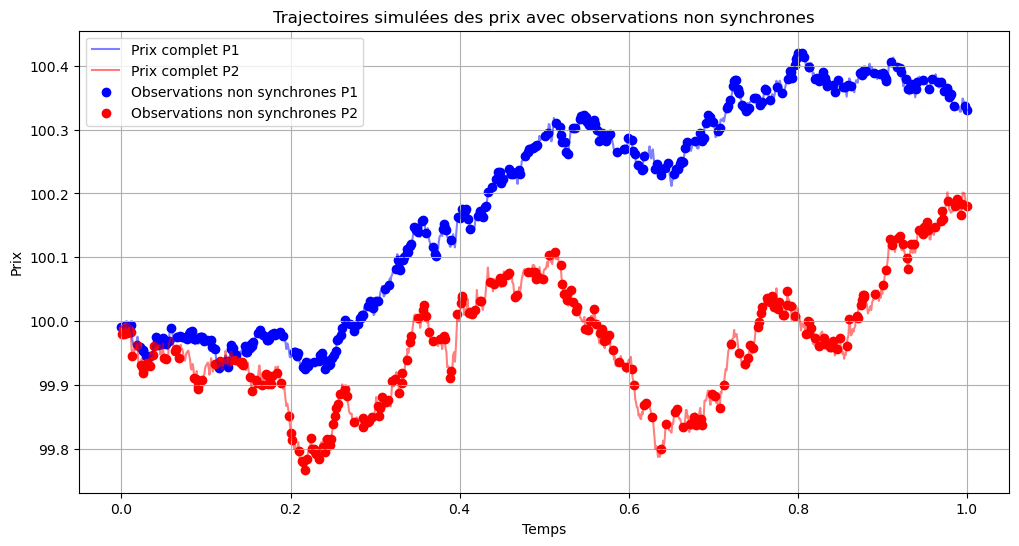

In [4]:
# Visualisation des prix
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, T, n_steps), P1, label="Prix complet P1", color="blue", alpha=0.5)
plt.plot(np.linspace(0, T, n_steps), P2, label="Prix complet P2", color="red", alpha=0.5)
plt.scatter(t1_obs, P1_obs, label="Observations non synchrones P1", color="blue")
plt.scatter(t2_obs, P2_obs, label="Observations non synchrones P2", color="red")
plt.title("Trajectoires simulées des prix avec observations non synchrones")
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.show()


In [5]:
# Paramètres globaux
n_simulations = 1000  # Nombre de simulations pour U_n
n_steps = 1000  # Nombre de pas dans le temps continu
T = 1.0  # Temps total
dt = T / n_steps
rho = 0.6  # Corrélation entre les deux actifs
vol_1, vol_2 = 0.2, 0.3  # Volatilités des actifs

U_n_values = []

for _ in range(n_simulations):
    # Simuler deux mouvements browniens corrélés
    dW1 = np.random.normal(0, np.sqrt(dt), n_steps)
    dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), n_steps)

    P1 = np.cumsum(dW1 * vol_1) + 100
    P2 = np.cumsum(dW2 * vol_2) + 100

    # Observation non synchrone
    obs_1 = np.sort(np.random.choice(range(n_steps), size=n_steps // 3, replace=False))
    obs_2 = np.sort(np.random.choice(range(n_steps), size=n_steps // 4, replace=False))
    P1_obs = P1[obs_1]
    P2_obs = P2[obs_2]
    t1_obs = np.linspace(0, T, n_steps)[obs_1]
    t2_obs = np.linspace(0, T, n_steps)[obs_2]

    # Calcul de U_n pour cette simulation
    def calculate_estimator(t1, P1, t2, P2):
        U_n = 0
        for i in range(len(t1) - 1):
            for j in range(len(t2) - 1):
                if t1[i+1] > t2[j] and t2[j+1] > t1[i]:
                    delta_P1 = P1[i+1] - P1[i]
                    delta_P2 = P2[j+1] - P2[j]
                    U_n += delta_P1 * delta_P2
        return U_n

    U_n_values.append(calculate_estimator(t1_obs, P1_obs, t2_obs, P2_obs))


Statistique du test de Shapiro-Wilk : 0.9974
p-value : 1.0522e-01


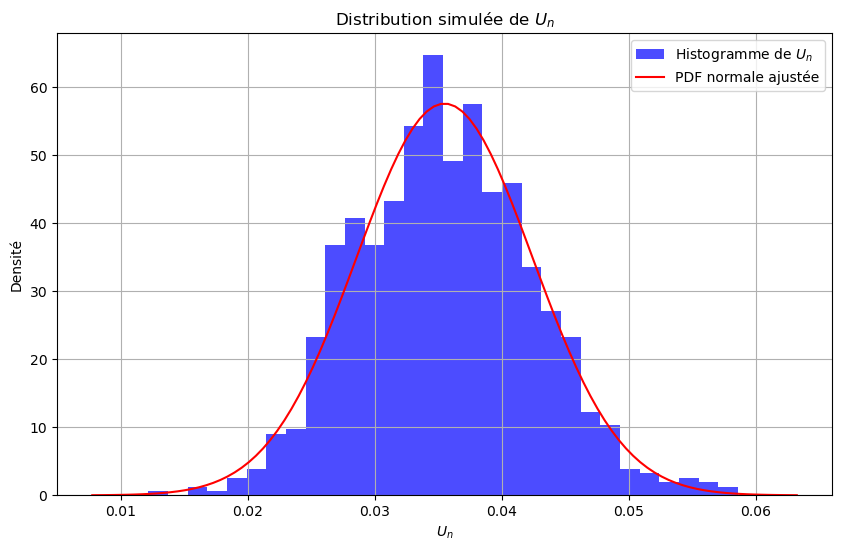

In [6]:
# Test de Shapiro-Wilk pour vérifier la normalité
shapiro_test = stats.shapiro(U_n_values)
print(f"Statistique du test de Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"p-value : {shapiro_test.pvalue:.4e}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.hist(U_n_values, bins=30, density=True, alpha=0.7, color='blue', label='Histogramme de $U_n$')
mean, std = np.mean(U_n_values), np.std(U_n_values)
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std), label='PDF normale ajustée', color='red')
plt.title("Distribution simulée de $U_n$")
plt.xlabel("$U_n$")
plt.ylabel("Densité")
plt.legend()
plt.grid()
plt.show()
